Fit a linear regression model and evaluate the result.

Try to improve the model (e.g. log transformation on skewed data, remove multi-co-linearity)

In [13]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model

In [3]:
housingsample2 = pd.read_excel('housingsample2.xlsx')

In [5]:
print("Boston housing dataset has {} data points with {} variables each.".format(*housingsample2.shape))

Boston housing dataset has 405 data points with 15 variables each.


In [6]:
housingsample2.head(10)

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53,28.2
1,343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9
2,47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80,16.6
3,67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10,22.0
4,362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19,20.8
5,132,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4,437.0,21.2,385.76,11.12,23.0
6,292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
7,31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4,307.0,21.0,376.73,13.04,14.5
8,218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276.0,16.4,396.90,17.92,21.5
9,90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81,22.6


In [7]:
housingsamplenew = housingsample2.drop(columns=['Unnamed: 0'])

In [8]:
print(housingsamplenew.describe())

                A           B           C           D           E           F  \
count  405.000000  405.000000  405.000000  405.000000  405.000000  405.000000   
mean     1.232397   13.658025    9.012000    0.144143    1.130407   16.083136   
std      2.355933   23.364688    7.089905    0.315400    1.697752   27.705168   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049320    0.000000    3.410000    0.000000    0.453000    5.976000   
50%      0.140300    0.000000    6.910000    0.000000    0.532000    6.377000   
75%      0.790410   18.100000   18.100000    0.000000    0.647000    6.951000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

                G           H           I           J           K           L  \
count  405.000000  405.000000  405.000000  405.000000  405.000000  405.000000   
mean    58.125455    6.259562   80.950617  337.301235   42.571160  330.344123   
std     33.199294    6.5781

In [9]:
housingsamplenew.isnull().sum()

A     0
B     0
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N    45
dtype: int64

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


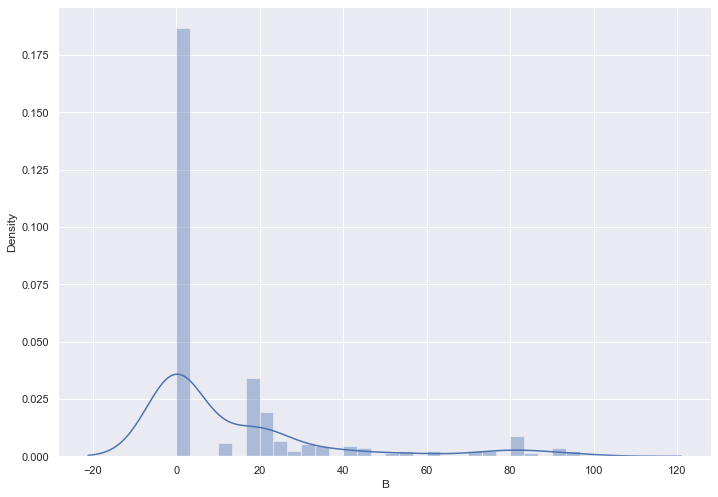

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housingsamplenew['B'], bins=30)
plt.show()

In [14]:
regr = linear_model.LinearRegression()

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

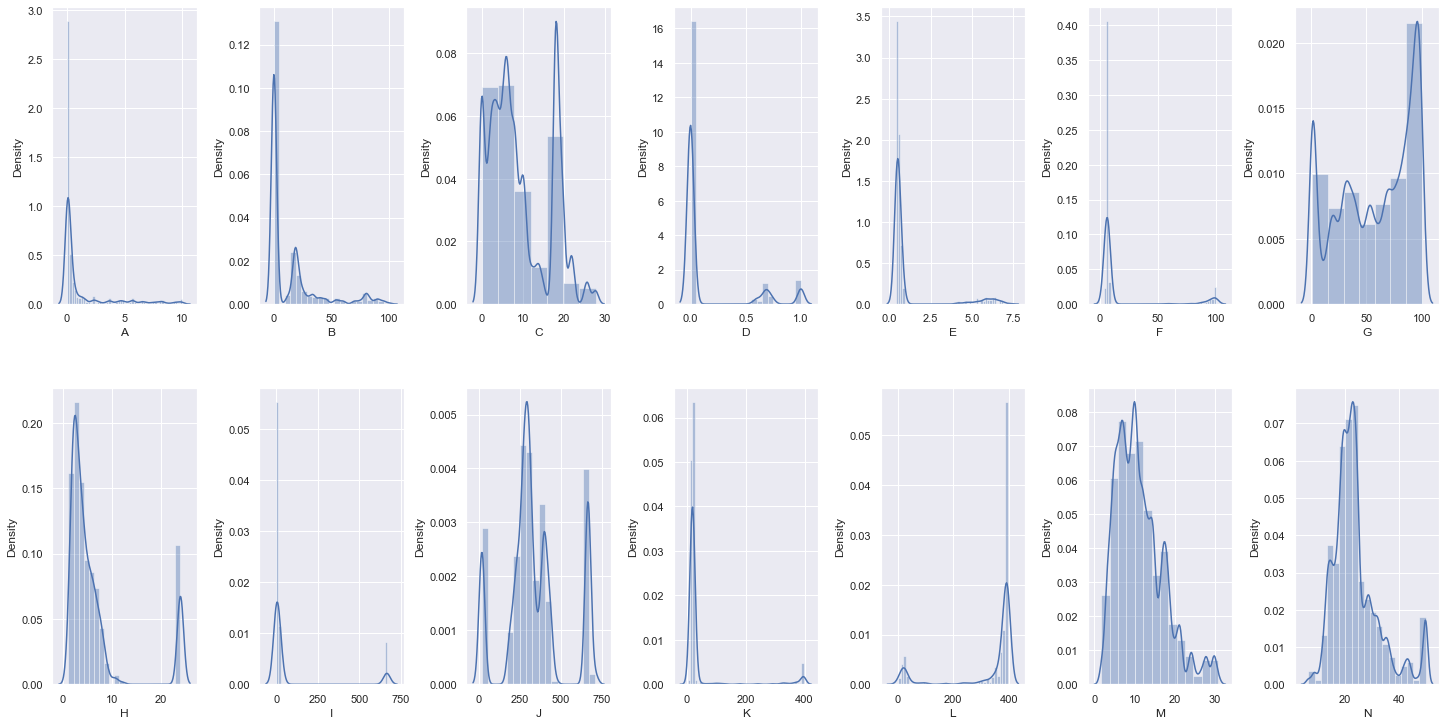

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housingsamplenew.items():
    sns.distplot(v, ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [18]:
correlation_matrix = housingsamplenew.corr().round(2)
correlation_matrix

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
A,1.00,-0.29,0.60,-0.08,-0.14,-0.19,0.46,-0.31,-0.15,0.76,-0.14,-0.08,0.40,-0.30
B,-0.29,1.00,-0.48,-0.01,0.03,0.07,-0.49,0.26,0.06,-0.25,0.04,0.02,-0.38,0.31
C,0.60,-0.48,1.00,-0.19,-0.40,-0.45,0.70,-0.60,-0.43,0.75,-0.35,0.23,0.43,-0.39
D,-0.08,-0.01,-0.19,1.00,0.60,0.59,-0.27,0.53,0.60,-0.36,0.46,-0.49,0.02,0.18
E,-0.14,0.03,-0.40,0.60,1.00,0.98,-0.56,0.93,0.99,-0.58,0.75,-0.86,0.10,-0.31
F,-0.19,0.07,-0.45,0.59,0.98,1.00,-0.60,0.95,0.99,-0.62,0.79,-0.85,0.05,0.72
G,0.46,-0.49,0.70,-0.27,-0.56,-0.60,1.00,-0.74,-0.59,0.63,-0.47,0.42,0.38,-0.29
H,-0.31,0.26,-0.60,0.53,0.93,0.95,-0.74,1.00,0.95,-0.69,0.75,-0.78,-0.05,0.11
I,-0.15,0.06,-0.43,0.60,0.99,0.99,-0.59,0.95,1.00,-0.60,0.78,-0.86,0.08,-0.23
J,0.76,-0.25,0.75,-0.36,-0.58,-0.62,0.63,-0.69,-0.60,1.00,-0.48,0.37,0.27,-0.34


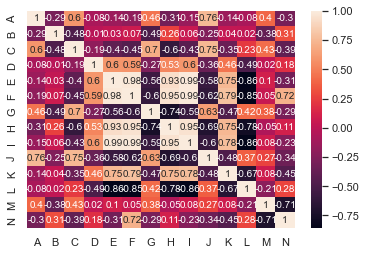

In [20]:
sns.heatmap(data=correlation_matrix, annot=True)